In [2]:
#Importing libraries
import math
import numpy as np
from matplotlib import pyplot as plt
from openpyxl import load_workbook
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
import pandas as pd
from openpyxl.reader.excel import load_workbook
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import neighbors, datasets
from openpyxl import load_workbook
from sklearn.model_selection import train_test_split
from random import shuffle
import random
from statistics import mean, stdev
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics    
from sklearn.svm import SVC
from heapq import nlargest
from itertools import combinations

## Reading-in data

In [3]:
#Opening the Excel file with data
filepath="credit_card_data.xlsx" #Enter full filepath here
wb=load_workbook(filepath)
sheet=wb.active

#set-wise data read-in 
def read(num):
    x, y = [], []
    
# 1. Male, 2. Age, 3. Debt, 4. Married, 5. Bank Customer, 6. Education Level, 7. Ethnicity, 8. Years Employed, 
# 9.Prior Default, 10. Employed, 11. Credit Score, 12. Driver's License, 13. Citizen, 14. Zip Code, 15. Income

#Considering data for only 4 columns
    cols = [8, 9, 10, 11]
    for i in cols:
        x.append(sheet.cell(row=num+1,column=i).value)
    y.append(sheet.cell(row=num+1,column=16).value)
    return x, y

x_data, y_data = [], []
for j in range(1, 690):
    valx, valy = read(j)
    
#Checks for missing data    
    
    if "?" in valx:
        print(j, read(j))
    x_data.append(valx)    
    y_data.append(valy)
print(x_data, y_data)
print(len(x_data[0]), len(y_data))

[[1.25, 1, 1, 1], [3.04, 1, 1, 6], [1.5, 1, 0, 0], [3.75, 1, 1, 5], [1.71, 1, 0, 0], [2.5, 1, 0, 0], [6.5, 1, 0, 0], [0.04, 1, 0, 0], [3.96, 1, 0, 0], [3.165, 1, 0, 0], [2.165, 0, 0, 0], [4.335, 1, 0, 0], [1, 1, 0, 0], [0.04, 0, 0, 0], [5, 1, 1, 7], [0.25, 1, 1, 10], [0.96, 1, 1, 3], [3.17, 1, 1, 10], [0.665, 1, 0, 0], [0.75, 1, 1, 7], [2.5, 1, 1, 17], [0.835, 1, 0, 0], [7.875, 1, 1, 6], [3.085, 1, 1, 1], [0.5, 1, 1, 3], [1.5, 1, 1, 2], [5.165, 1, 1, 9], [15, 1, 1, 17], [7, 1, 1, 3], [5, 1, 1, 6], [5.04, 1, 1, 5], [7.96, 1, 1, 8], [7.585, 1, 1, 15], [5, 1, 0, 0], [0.415, 1, 1, 5], [2, 1, 1, 11], [1.835, 1, 1, 12], [0.5, 1, 1, 2], [0.25, 1, 1, 2], [14.415, 1, 1, 11], [4.5, 1, 1, 12], [5.335, 1, 1, 11], [0.75, 1, 1, 1], [8.625, 1, 1, 6], [28.5, 1, 1, 40], [2.625, 1, 1, 11], [0.125, 1, 1, 23], [6.04, 1, 1, 3], [3.5, 0, 0, 0], [0.165, 0, 0, 0], [0.875, 1, 0, 0], [1.75, 1, 0, 0], [0.04, 1, 0, 0], [0, 1, 0, 0], [7.415, 1, 0, 0], [0.835, 1, 0, 0], [0.085, 1, 0, 0], [5, 1, 0, 0], [5.75, 0, 0, 

## Shuffling and train-test split

In [4]:
from sklearn.utils import shuffle

#Shuffle the order of the data
toshuffle = list(zip(x_data, y_data))
x_data, y_data = zip(*toshuffle)

#Splitting into train and test set
cut = 600
train_x, train_y = x_data[0:cut], y_data[0:cut]
test_x, test_y = x_data[cut:690], y_data[cut:690]

train_x, train_y = np.asarray(train_x), np.asarray(train_y)
test_x, test_y = np.asarray(test_x), np.asarray(test_y)

## Artificial Neural Network (Shitij)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Mean: 0.0
New Mean: 0.0


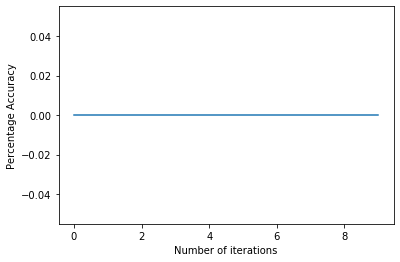

In [4]:
#Runs 10 iterations of ANN and gives out the mean accuracy of the highest 5 accuracies
per_acc = []
for i in range(10):
   
#Calling MLP classifier
    ann = MLPClassifier(activation= 'tanh', hidden_layer_sizes= (100,), learning_rate= 'constant',  max_iter= 100, 
                      solver= 'lbfgs', tol= 0.01, validation_fraction= 0.1, early_stopping=True,
                      n_iter_no_change=100, verbose=True)
    
#Training the network
    train_y = np.asarray(train_y)
    ann.fit(train_x, train_y.ravel())

#Gives probabilistic predictions
    prediction = ann.predict_proba(test_x)

    c = 0
    for each in range(len(prediction)):
        if np.argmax(prediction[each]) == test_y[each]:
            c += 1

    per =  float(c / len(prediction)) * 100
    print(per)
    per_acc.append(per)

print('Mean:', mean(per_acc))
sort = nlargest(5, per_acc)
print('New Mean:', mean(sort))
x = np.arange(0, 10)
plt.plot(x, per_acc)
plt.xlabel('Number of iterations')
plt.ylabel('Percentage Accuracy')
plt.show()

## Logistic Regression (Yusri)

c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversio

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
New Mean: 0.0


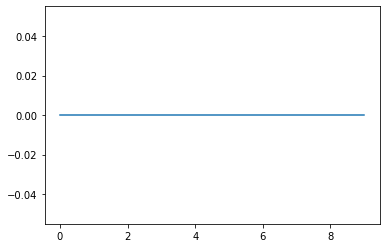

In [5]:
#Runs 10 iterations of LR and gives out the mean accuracy of the highest 5 accuracies
per_acc=[]                                                                   
for i in range(10):

    lr = LogisticRegression(C=0.9, penalty='l1', tol=0.01)
    lr.fit(train_x, train_y)
    y_pred=lr.predict(test_x)

    score = metrics.accuracy_score(test_y, y_pred)
    print(score)
    per_acc.append(score)
    
print(mean(per_acc))
sort = nlargest(5, per_acc)
print('New Mean:', mean(sort))
x = list(range(len(per_acc)))
plt.plot(x,per_acc)
plt.show()

## K-Nearest Neighbors (YuanJea)

In [6]:
#Just one iteration as it returns consistent results for every iteration 

knn = KNeighborsClassifier(n_neighbors=15, weights='uniform', algorithm='auto', leaf_size=1, p=1 ,metric='minkowski')

knn.fit(train_x, train_y)

predicted = knn.predict_proba(test_x)

c = 0
for each in range(len(predicted)):
    if np.argmax(predicted[each]) == test_y[each]:    
        c += 1

print("Percentage Accuracy: ", float(c/len(predicted))*100)

Percentage Accuracy:  0.0


c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


## Support Vector Machines (Yusri)

In [7]:
mylist=[]
for i in range(10):
    
    svm = SVC(kernel= 'linear', C= 1.) #svm Classifier
    svm.fit(train_x, train_y)          #Train the model using the training sets
    y_pred = svm.predict(test_x)               #Predict the response for test datasetfrom sklearn import metric

    x = metrics.accuracy_score(test_y, y_pred)*100

    print("Accuracy:" , x )
    mylist.append(x)

print("Mean: " , mean(mylist))

Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Mean:  0.0


c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversio

## Random Forest (Deryck)

c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Random Forest classifier has accuracy of:  0.7415730337078652


c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Random Forest classifier has accuracy of:  0.7415730337078652


c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Random Forest classifier has accuracy of:  0.7303370786516854


c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Random Forest classifier has accuracy of:  0.7528089887640449


c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Random Forest classifier has accuracy of:  0.7415730337078652


c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Random Forest classifier has accuracy of:  0.7415730337078652


c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Random Forest classifier has accuracy of:  0.7303370786516854


c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Random Forest classifier has accuracy of:  0.7528089887640449


c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Random Forest classifier has accuracy of:  0.7303370786516854


c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Random Forest classifier has accuracy of:  0.7415730337078652
0.7404494382022472
New Mean: 0.7460674157303371


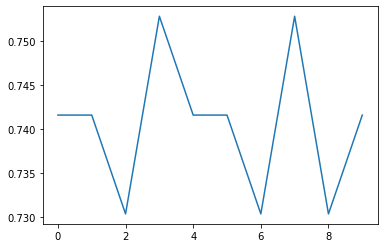

In [12]:
#Runs 10 iterations of RF and gives out the mean accuracy of the highest 5 accuracies

per_acc=[]                                                                   
for i in range(10):
    rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=None, max_features='auto',
                                max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=2,
                                min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=200,
                                oob_score=False, verbose=0, warm_start=False)
    rf.fit(train_x, train_y)
    y_pred = rf.predict(test_x)
    print("Random Forest classifier has accuracy of: ", rf.score(test_x, test_y))
    per_acc.append(rf.score(test_x, test_y))
    
print(mean(per_acc))
sort = nlargest(5, per_acc)
print('New Mean:', mean(sort))

x = list(range(len(per_acc)))
plt.plot(x,per_acc)
plt.show()

## Decision Trees (Deryck)

Accuracy: 0.7415730337078652
Accuracy: 0.7303370786516854
Accuracy: 0.7191011235955056
Accuracy: 0.7191011235955056
Accuracy: 0.7191011235955056
Accuracy: 0.7191011235955056
Accuracy: 0.7415730337078652
Accuracy: 0.7303370786516854
Accuracy: 0.7415730337078652
Accuracy: 0.7191011235955056
0.7280898876404495
New Mean: 0.7370786516853933


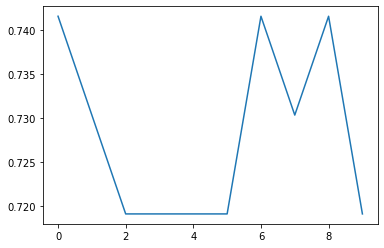

In [13]:
per_acc=[]
for i in range(10):
    tree = DecisionTreeClassifier(max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                                  min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.0, presort=False,
                                  random_state=None, splitter='best')
    tree = tree.fit(train_x, train_y)
    print("Accuracy:", tree.score(test_x, test_y))
    per_acc.append(tree.score(test_x, test_y))
    

print(mean(per_acc))
sort = nlargest(5, per_acc)
print('New Mean:', mean(sort))

x = list(range(len(per_acc)))
plt.plot(x,per_acc)
plt.show()

## Voting Classifier

In [14]:
#Ensembling by using a voting classifier

alg = [('ann', ann), ('lr', lr), ('knn', knn), ('svm', svm), ('rf', rf), ('dt', tree)]

#Creates all possible combinations of the individual algorithms used
combs, allcombs = [], []
for i in range(1, len(alg)+1):
    els = [list(x) for x in combinations(alg, i)]
    combs.append(els)

for i in combs:
    for j in i:
        allcombs.append(j)
        print(j)

# allcombs

[('ann', MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=100, momentum=0.9,
              n_iter_no_change=100, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.01,
              validation_fraction=0.1, verbose=True, warm_start=False))]
[('lr', LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.01, verbose=0,
                   warm_start=False))]
[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=1,
     

## Ensembling for all combinations

In [15]:
#Returns mean, standard deviation and run time for accuracies from 50 iterations of each combination.
#Also returns the mean and standard deviation for the top 5 iterations in terms of the accuracies

mod4, accs4, times4, allofem4 = [], [], [], []
counter = 0
for i in allcombs:
    acc = []
    start = time()
    for j in range(0, 50):
#Voting classifier from scikit-learn
        eclf1 = VotingClassifier(estimators=[i[0]], voting='soft')
        eclf1 = eclf1.fit(train_x, train_y.ravel())
        pred = eclf1.predict(test_x)
        acc.append(metrics.accuracy_score(test_y, pred))
    end = time()
    tt = end - start
#Selects 5 largest accuracies
    sort = nlargest(5, acc)
    print(i)
    print('Mean:', mean(acc))
    print('Stdev:', stdev(acc))
    print('New Mean:', mean(sort))
    print('New Stdev:', stdev(sort))
    print('Avg Time:', tt/50)
    mod4.append(i)
    accs4.append((mean(acc), stdev(acc), mean(sort), stdev(sort)))
    times4.append(tt/50)
    allofem4.append((i, mean(acc), stdev(acc), mean(sort), stdev(sort), tt/50))
    counter += 1
    print('%d iterations done out of 63' %counter)

[('ann', MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=100, momentum=0.9,
              n_iter_no_change=100, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.01,
              validation_fraction=0.1, verbose=True, warm_start=False))]
Mean: 0.8049438202247191
Stdev: 0.005902014867046632
New Mean: 0.8089887640449438
New Stdev: 0.0
Avg Time: 0.061329345703125
1 iterations done out of 64
[('lr', LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.01, verbose=0,
                   warm_start=False))]
Mean: 0.

AttributeError: predict_proba is not available when  probability=False

In [13]:
#Prints cumulative results from the above cell
allofem4

[([('ann',
    MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
                  beta_2=0.999, early_stopping=True, epsilon=1e-08,
                  hidden_layer_sizes=(100,), learning_rate='constant',
                  learning_rate_init=0.001, max_iter=100, momentum=0.9,
                  n_iter_no_change=100, nesterovs_momentum=True, power_t=0.5,
                  random_state=None, shuffle=True, solver='lbfgs', tol=0.01,
                  validation_fraction=0.1, verbose=True, warm_start=False))],
  0.927,
  0.004830458915396484,
  0.93,
  0.0,
  0.03837428092956543),
 ([('lr',
    LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
                       intercept_scaling=1, l1_ratio=None, max_iter=100,
                       multi_class='warn', n_jobs=None, penalty='l1',
                       random_state=None, solver='warn', tol=0.01, verbose=0,
                       warm_start=False))],
  0.93,
  0.0,
  0.93,
  0.0,
  0.0